# Case Study #02 - Measures of Central Tendency and Dispersion

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/tomsbastin97/anaconda3/lib/python3.8/site-packages')
import seaborn as sns

### Read the dataset to the python environment.

In [11]:
dataset = pd.read_csv('W6StudentsPerformance.csv')
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


### 1. Find out how many males and females participated in the test.

In [12]:
dataset['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

### 2. What do you think about the students' parental level of education?

In [13]:
dataset['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

As we can see more than 60% of parents have some type of college education which might be a contributing reason to send their children for higher education.

### 3. Who scores the most on average for math, reading and writing based on
### ● Gender 
### ● Test preparation course

In [14]:
#Scores of male students 
dataset.loc[dataset['gender'] == 'male'].describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.821577,65.545643,63.446058
std,14.556411,14.149594,14.227225
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,76.000000,74.000000
max,100.000000,100.000000,100.000000


In [15]:
#Scores of female students 
dataset.loc[dataset['gender'] == 'female'].describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.376448,72.590734,72.467181
std,16.029928,14.411018,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [16]:
#Scores of students who have not attended any preparation courses
dataset.loc[dataset['test preparation course'] == 'none'].describe()

,math score,reading score,writing score
count,642.000000,642.000000,642.000000
mean,63.789720,66.417445,64.457944
std,15.705689,14.608896,15.041667
min,0.000000,17.000000,10.000000
25%,54.000000,57.000000,54.000000
50%,64.000000,67.000000,65.000000
75%,74.000000,76.000000,74.000000
max,100.000000,100.000000,100.000000


In [17]:
#Scores of students who have attended a preparation course
dataset.loc[dataset['test preparation course'] == 'completed'].describe()

,math score,reading score,writing score
count,358.000000,358.000000,358.000000
mean,69.966480,74.175978,74.684358
std,14.521847,13.537572,13.236412
min,23.000000,37.000000,36.000000
25%,61.000000,66.000000,67.000000
50%,70.000000,75.000000,76.000000
75%,79.000000,84.000000,83.750000
max,100.000000,100.000000,100.000000


From the above data we make the following conclusions:
1. Average scores for math is higher for male students than female students while it is vice versa for reading and writing subjects.
2. Average scores for all the subjects are higher for students who have completed a test preparation course than students who have not attended the same.

### 4. What do you think about the scoring variation for math, reading and writing based on
### ● Gender
### ● Test preparation course

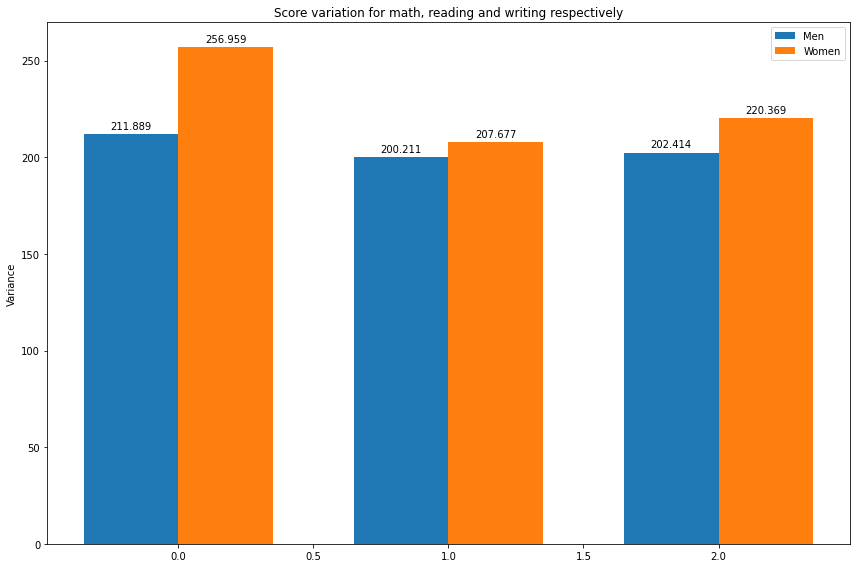

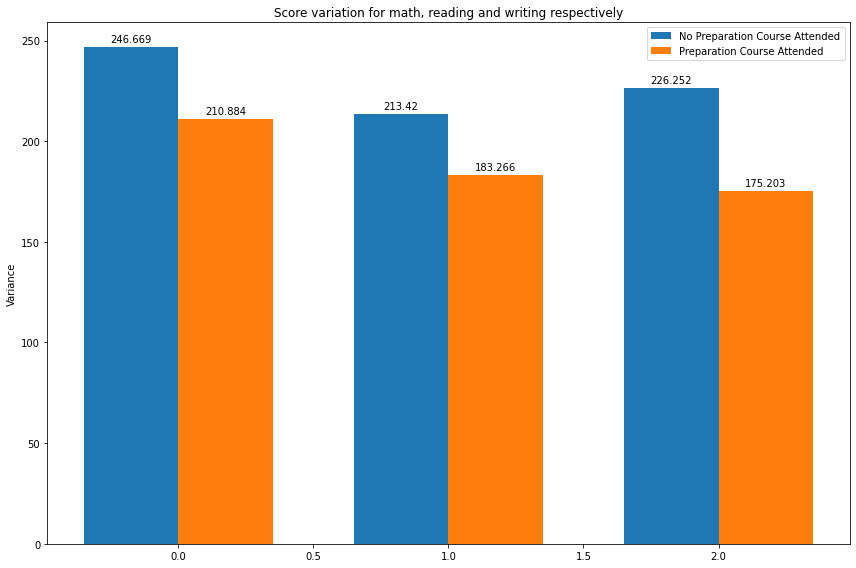

In [30]:
male = dataset.loc[dataset['gender'] == 'male']
maleAVG = male[['math score', 'reading score', 'writing score']].var(axis=0)
female = dataset.loc[dataset['gender'] == 'female']
femaleAVG = female[['math score', 'reading score', 'writing score']].var(axis=0)
labels = ['Math score', 'Reading score', 'Writing score']
x = np.arange(len(labels))  # the label locations
width = 0.35 


fig, ax = plt.subplots(figsize =(12, 8))
rects1 = ax.bar(x - width/2, list(maleAVG.values), width, label='Men')
rects2 = ax.bar(x + width/2, list(femaleAVG.values), width, label='Women')
ax.set_ylabel('Variance')
ax.set_title('Score variation for math, reading and writing respectively')
#ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()




noTestC = dataset.loc[dataset['test preparation course'] == 'none']
nTCavg = noTestC[['math score', 'reading score', 'writing score']].var(axis=0)
TestC = dataset.loc[dataset['test preparation course'] == 'completed']
TCavg = TestC[['math score', 'reading score', 'writing score']].var(axis=0)
labels = ['Math score', 'Reading score', 'Writing score']
x = np.arange(len(labels))  # the label locations
width = 0.35 


fig, ax = plt.subplots(figsize =(12, 8))
rects1 = ax.bar(x - width/2, list(nTCavg.values), width, label='No Preparation Course Attended')
rects2 = ax.bar(x + width/2, list(TCavg.values), width, label='Preparation Course Attended')
ax.set_ylabel('Variance')
ax.set_title('Score variation for math, reading and writing respectively')
#ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

From the above data we make the following conclusions

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

This is the list of students that come in the top 25% students based on their math score.

In [ ]:
df = dataset.sort_values(by=['math score']).tail(250)
pd.set_option('display.max_rows', df.shape[0])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
852,male,group D,some college,free/reduced,none,77,62,64
853,male,group D,associate's degree,free/reduced,none,77,78,73
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
429,female,group E,some high school,standard,none,77,79,80
427,female,group D,associate's degree,standard,none,77,77,73
428,female,group D,some college,free/reduced,none,77,86,86
421,female,group C,some college,free/reduced,none,77,90,91
415,female,group B,master's degree,free/reduced,completed,77,97,94
